# 0 - Introduction

In [1]:
import os
import numpy as np
import pandas as pd
import sys

src_path = os.path.abspath(os.path.join(os.getcwd(), '..','..'))
sys.path.append(src_path)

from src import dataframe_visualizer

# Shipmans Figure 0.1

In [2]:
# Load the csv file from inputs folder
df = pd.read_csv('inputs/00-1-shipman-confirmed-victims-x.csv')
df.head()

,DateofDeath,Name,Age,PlaceofDeath,Decision,yearOfDeath,gender,fractionalDeathYear,ageBracket,gender2
0,17-Mar-75,Eva Lyons,70,Own home,Unlawful killing,1975,0,1974.71,70-74,Women
1,07-Aug-78,Sarah Hannah Marsland,86,Own home,Unlawful killing,1978,0,1978.10,85-89,Women
2,30-Aug-78,Mary Ellen Jordan,73,Own home,Unlawful killing,1978,0,1978.16,70-74,Women
3,07-Dec-78,Harold Bramwell,73,Own home,Unlawful killing,1978,1,1978.44,70-74,Men
4,20-Dec-78,Annie Campbell,88,Own home,Unlawful killing,1978,0,1978.47,85-89,Women


In [3]:
# Create a new column for man and woman, if gender is 1 man, if 0 then is woman
df['Age Men'] = df.apply(lambda row: row['Age'] if row['gender'] == 1 else None, axis=1)
df['Age Women'] = df.apply(lambda row: row['Age'] if row['gender'] == 0 else None, axis=1)

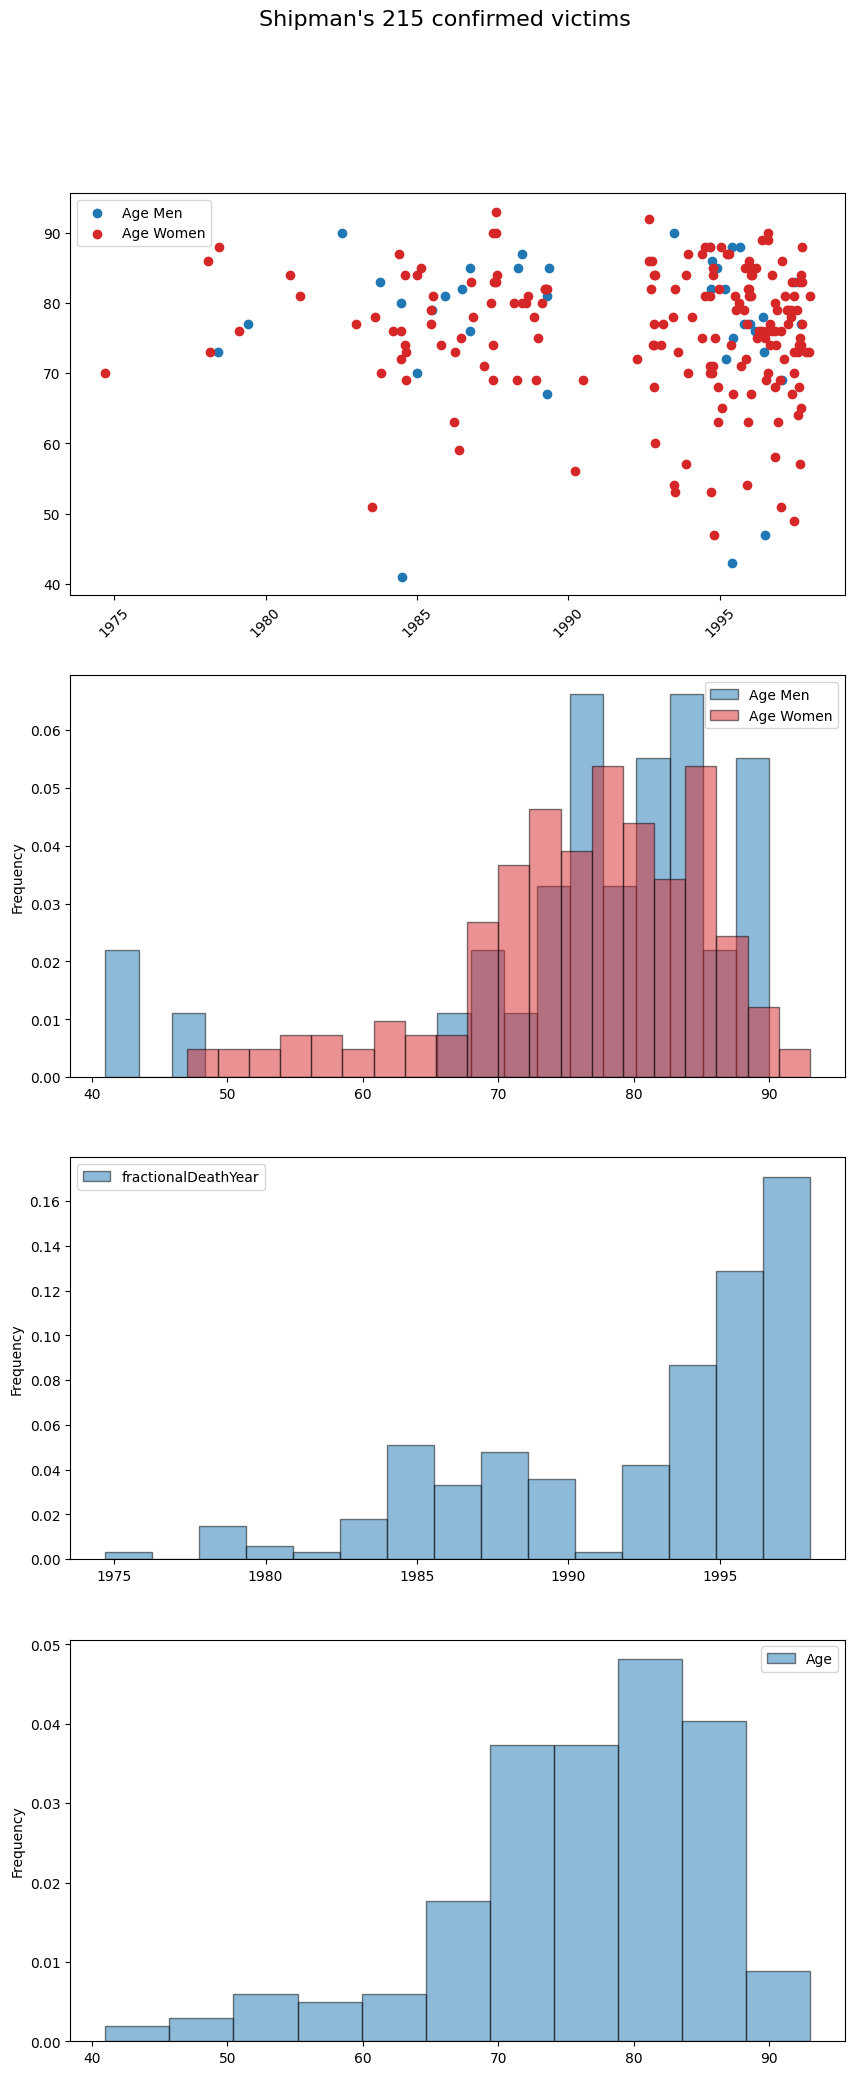

In [4]:
v = dataframe_visualizer.DataFrameVisualizer(df)

plot_params = [
    {
        'plot_type': 'scatterplot',  
        'x_column': 'fractionalDeathYear',
        'y_columns': ['Age Men', 'Age Women'],
        'colors': ['blue', 'red'], # default None
        'legend': True, # default True,
    },
    {
        'plot_type': 'histogram',  
        'y_columns': ['Age Men', 'Age Women'],
        'colors': ['blue', 'red'], # default None
        'legend': True, # default True,
        'bins': 20 # default 0.
    },
    {
        'plot_type': 'histogram',  
        'y_columns': ['fractionalDeathYear'],
        'colors': ['blue'], # default None
        'legend': True, # default True,
        'bins': 15 # default 0.
    },
    {
        'plot_type': 'histogram',  
        'y_columns': ['Age'],
        'colors': ['blue'], # default None
        'legend': True, # default True,
        'bins': 11 # default 0.
    }
]

figure_params = {
    'n_plots': 4, # default 1
    'fig_length': 10, # default 10
    'fig_height': 24, # default 6
    'x_rotation': 45, # default 45
    'share_x': False, # default False
    'share_y': False, # default False
    'x_limits': None,
    'y_limits': None,
    'title': 'Shipman\'s 215 confirmed victims' # default None
}

v.plot(figure_params=figure_params, plot_params=plot_params)

# Shipman's Figure 0.2

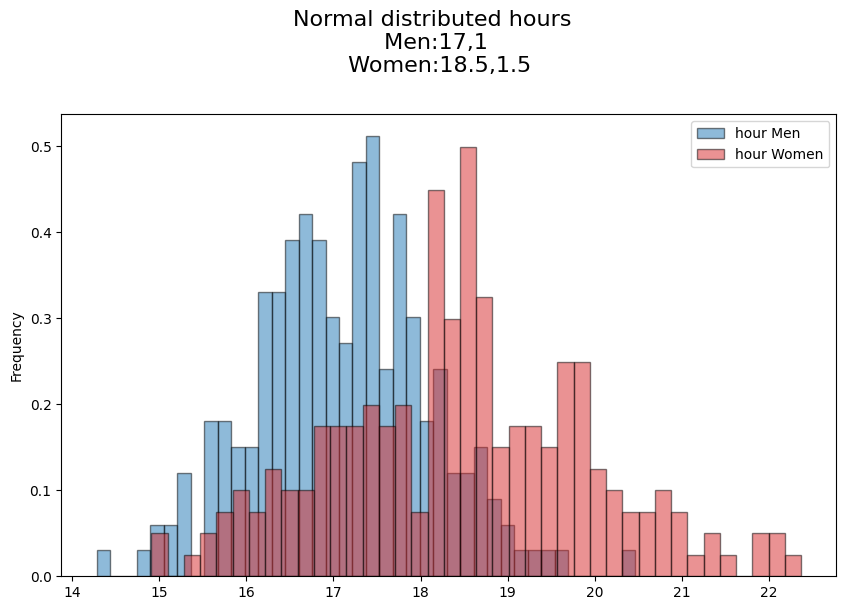

In [36]:
# Create a set of normal distributed data with df length
mean_men, std_men = 17, 1
mean_women, st_women = 18.5, 1.5

df['hour Men'] = np.random.normal(mean_men, std_men, len(df))
df['hour Women'] = np.random.normal(mean_women, std_women, len(df))

v = dataframe_visualizer.DataFrameVisualizer(df)

plot_params = [
    {
        'plot_type': 'histogram',  
        'y_columns': ['hour Men', 'hour Women'],
        'colors': ['blue', 'red'], # default None
        'legend': True, # default True,
        'bins': 40 # default 0.
    },
]

figure_params = {
    'n_plots': 1, # default 1
    'fig_length': 10, # default 10
    'fig_height': 6, # default 6
    'x_rotation': 45, # default 45
    'share_x': False, # default False
    'share_y': False, # default False
    'x_limits': None,
    'y_limits': None,
    'title': f'Normal distributed hours \n Men:{mean_men},{std_men} \n Women:{mean_women},{st_women}' # default None
}

v.plot(figure_params=figure_params, plot_params=plot_params)
